"Gold standard" reference lists of MWEs, ranked for compositionality.
As used in Roberts & Egg (2018).

* __F_ENC__: Farahmand et al, 2015. __[farahmand_comp_data]__
 * 1042 noun compounds
 * 5 binary judgements -> Likert scale
* __R_ENC__: Reddy et al, 2011. __[reddy_comp_data]__
 * 90 noun compounds
 * Mechanical Turk, 6 binary judgements -> Likert
* __MC_VPC__: McCarthy et al 2003. __[mccarthy_comp_vpc]__
 * 117 verb-particle pairs
 * 3 judges, avergaed scores on 11-point scale.
* __D_ADJN__: Biemann and Giesbrecht. __[disco_2011]__
 * 68 Adj-NN compounds from (training and validation) for Disco 2011.
 * Mechanical Turk, 11-point scale.
* __MC_VN__: McCarthy et al 2007.  __[mccarthy_comp_vn]__
 * 638 verb-object pairs
 * 2 judges, 6-point scale.

In [1]:
import os

path = 'C:/Users/'+os.getlogin()+'/Google Drive/University/Dissertation'
datapath = 'C:/Users/'+os.getlogin()+'/Dissertation Data'
#datapath = 'E:/Dissertation Data'

os.chdir(path)
os.getcwd()

'C:\\Users\\tom\\Google Drive\\University\\Dissertation'

In [3]:
import pandas as pd
import numpy as np

In [4]:
def exp_to_tuple(exp,sep=' '):
    return tuple(exp.split(sep))

In [5]:
# Import Farahmand et al's list of compound nouns - 1042

F_ENC = pd.read_csv(path+'/Data/Gold Standards/en_ncs_noncompositional_conventionalized/instances_judgments/comb-judgements.csv')

F_ENC['noncomp_score'] = F_ENC[['noncomp_1', 'noncomp_2', 'noncomp_3', 'noncomp_4']].sum(axis=1)

F_ENC = F_ENC[['compound', 'noncomp_score']].sort_values('noncomp_score', ascending=False).rename(columns={'compound' : 'mwe', 'noncomp_score' : 'gs_score'}).reset_index(drop=True)

F_ENC['mwe'] = F_ENC.mwe.apply(exp_to_tuple)

F_ENC

,mwe,gs_score
0,"(academy, award)",4
1,"(hard, disk)",4
2,"(goose, bumps)",4
3,"(grass, roots)",4
4,"(greenhouse, gas)",4
...,...,...
1037,"(graduation, day)",0
1038,"(grain, requirements)",0
1039,"(grape, leaves)",0
1040,"(belief, system)",0


In [6]:
# Import Reddy et al's noun compounds

R_ENC = pd.read_csv(path+'/Data/Gold Standards/ijcnlp_compositionality_data/MeanAndDeviations.clean.txt',
                   sep = "\s+").reset_index()

def subber(s):
    return s[:-2]

R_ENC['mwe'] = R_ENC['index'].apply(subber) + ' ' + R_ENC['#word'].apply(subber)
R_ENC['gs_score'] = 5 - R_ENC.Cpd_mean

R_ENC = R_ENC[['mwe' , 'gs_score']].sort_values('gs_score', ascending = False).reset_index(drop=True)

R_ENC['mwe'] = R_ENC.mwe.apply(exp_to_tuple)

R_ENC

,mwe,gs_score
0,"(gravy, train)",4.689655
1,"(cloud, nine)",4.666667
2,"(ivory, tower)",4.535714
3,"(melting, pot)",4.461538
4,"(silver, bullet)",4.333333
...,...,...
85,"(speed, limit)",0.172414
86,"(swimming, pool)",0.133333
87,"(graduate, student)",0.100000
88,"(engine, room)",0.068966


In [7]:
# MC_VPC
MC_VPC1 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge1',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()   # Duplicate entry for "look+up" - removed

MC_VPC1.columns= ['mwe', 'freq', 'comp1']
#MC_VPC1['comp1'] = MC_VPC1.comp1.astype(float)

MC_VPC2 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge2',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()

MC_VPC2.columns= ['mwe', 'freq', 'comp2']

MC_VPC3 = pd.read_csv(path+'/Data/Gold Standards/vpc_comp_mccarthy/Judge3',
                   sep = '\s*\:\s*', header = None, index_col=0,
                      na_values = '?', engine='python'
                     ).reset_index(drop=True).drop_duplicates()

MC_VPC3.columns= ['mwe', 'freq', 'comp3']

MC_VPC = MC_VPC1.merge(MC_VPC2,on=['mwe', 'freq']).merge(MC_VPC3,on=['mwe', 'freq'])

MC_VPC['gs_score'] = 10 - MC_VPC[['comp1', 'comp2', 'comp3']].mean(axis=1, skipna=True)

MC_VPC = MC_VPC.sort_values('gs_score', ascending = False)[['mwe','gs_score']].reset_index(drop=True)

MC_VPC['mwe'] = MC_VPC.mwe.apply(exp_to_tuple, sep='+')

MC_VPC

,mwe,gs_score
0,"(cock, up)",9.333333
1,"(whip, off)",8.500000
2,"(space, out)",8.333333
3,"(stave, off)",8.333333
4,"(write, off)",8.333333
...,...,...
111,"(step, out)",1.333333
112,"(lie, down)",1.000000
113,"(pull, down)",0.333333
114,"(see, down)",0.000000


In [8]:
D_ADJN_test = pd.read_csv(path+'/Data/Gold Standards/DISCo 2011/english/num_scores/DISCo_num_EN_test.tsv',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
D_ADJN_test.columns = ['class', 'mwe', 'gs_score']

# Only interested in ADJ_NN compounds
D_ADJN_test = D_ADJN_test[D_ADJN_test['class'] == 'EN_ADJ_NN'].drop('class', axis=1)



D_ADJN_train = pd.read_csv(path+'/Data/Gold Standards/DISCo 2011/english/num_scores/DISCo_num_EN_train.tsv',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
D_ADJN_train.columns = ['class', 'mwe', 'gs_score']

# Only interested in ADJ_NN compounds
D_ADJN_train = D_ADJN_train[D_ADJN_train['class'] == 'EN_ADJ_NN'].drop('class', axis=1)


D_ADJN = D_ADJN_train.append(D_ADJN_test)

D_ADJN['gs_score'] = 100 - D_ADJN.gs_score

D_ADJN = D_ADJN.sort_values('gs_score', ascending = False).reset_index(drop=True)

D_ADJN['mwe'] = D_ADJN.mwe.apply(exp_to_tuple)

D_ADJN

,mwe,gs_score
0,"(blue, chip)",89
1,"(red, tape)",89
2,"(second, hand)",86
3,"(right, wing)",84
4,"(smart, card)",82
...,...,...
130,"(short, distance)",3
131,"(early, version)",2
132,"(small, island)",2
133,"(olive, oil)",1


In [9]:
MC_VN = pd.read_csv(path+'/Data/Gold Standards/emnlp2007data.txt',
                   sep = '\t', header = None
                     ).reset_index(drop=True)
MC_VN.columns = ['mwe', 'judge1', 'judge2']

MC_VN['gs_score'] = 6- MC_VN[['judge1', 'judge2']].mean(axis=1)

MC_VN = MC_VN[['mwe','gs_score']].sort_values('gs_score', ascending=False).reset_index(drop=True)

MC_VN['mwe'] = MC_VN.mwe.apply(exp_to_tuple)

MC_VN

,mwe,gs_score
0,"(have, heart)",5.0
1,"(catch, eye)",5.0
2,"(take, step)",5.0
3,"(take, root)",5.0
4,"(leave, mark)",5.0
...,...,...
633,"(eat, food)",0.0
634,"(pay, amount)",0.0
635,"(buy, house)",0.0
636,"(discuss, problem)",0.0


In [10]:
# R&E's own outputs

robegg = open(path+'/Data/RobertsEgg/MWE_en-filtered.utf8.txt', 'r', encoding='utf-8')

for lines in range(10):
    print(robegg.readline())

compo	assoc	mwe	words

-2	36.4506646641	")− 1

-2	28.826415177	"— weiler

-2	22.6054361674	"—&# X200B

-2	22.8166041032	$11.6 million

-2	27.2593711387	$23.5 million

-2	24.1214802321	$24.5 million

-2	28.2280390416	$25.5 million

-2	24.394108659	$28.5 million

-2	22.9419298938	$297.00. Poços



In [11]:
with open(path+'/Data/RobertsEgg/MWE_en-unfiltered.utf8.txt', 'r', encoding='utf-8') as robegg:
    robegg_df = pd.read_csv(robegg, names=['compo', 'assoc', 'mwe', 'w1', 'w2', 'w3'], 
                              delimiter='\t', na_values = ['--'], quoting=3, skiprows=1, skipinitialspace=True)

# Remove negative compositionality scores - R&E's filter
#robegg_df = robegg_df[robegg_df.compo >= -1].reset_index(drop=True)

robegg_df['mwe'] = robegg_df.mwe.apply(exp_to_tuple)

robegg_df

,compo,assoc,mwe,w1,w2,w3
0,-0.216884,452.575930,"(this, individual, as)",NaN,-0.216884,NaN
1,-0.177191,1291.822316,"(that, in, humans)",NaN,NaN,-0.177191
2,-0.161933,191.902424,"(individual, as, the)",-0.161933,NaN,NaN
3,-0.160100,49.378076,"(It, returned, one)",NaN,-0.160100,NaN
4,-0.144707,48.891020,"(had, two, more)",NaN,NaN,-0.144707
...,...,...,...,...,...,...
917642,0.941358,407.051275,"(Avenue, and)",0.941358,NaN,NaN
917643,0.944386,3105.318760,"(whether, or, not)",0.944386,NaN,NaN
917644,0.946745,143.658118,"(Records, and)",0.946745,NaN,NaN
917645,0.946882,67.013677,"(މ, ަ)",0.936615,0.957148,NaN


In [ ]:
# Join ignoring case

# If duplicates, keep most frequently-observed

In [55]:
def lowtup(intup):
    return tuple(str.lower(t) for t in intup)


def corr_with_gs(inframe, scorecol, gsframe, refscore='gs_score', tiebreak = 'assoc', mult=-1):
    '''
    Merge is case-insensitive. When this creates duplicates, retain record with largest value of tiebreak
    '''
    
    if str(inframe) == str(gsframe) and scorecol == refscore:
        return (len(inframe), 1.0, 1.0)
    
    _intersection = inframe[['mwe', scorecol, tiebreak]].merge(gsframe[['mwe', refscore]], 
                                         left_on=inframe.mwe.apply(lowtup), 
                                         right_on = gsframe.mwe.apply(lowtup), 
                                         how='inner')
    
    _intersection = _intersection.sort_values(['key_0', tiebreak], ascending = [True, False]).drop_duplicates(subset=['key_0']).reset_index(drop=True)
    
    _overlap = len(_intersection)
    if _overlap:
        c_pears = _intersection[scorecol].corr(_intersection[refscore], method="pearson")
        c_spear = _intersection[scorecol].corr(_intersection[refscore], method="spearman")
    else:
        c_pears = np.nan
        c_spear = np.nan
        
    return (_overlap, mult*c_spear, mult*c_pears)

In [86]:
def corr_df(inframe, scorecol, gsframe, refscore='gs_score', tiebreak = 'assoc', mult=-1):
    '''
    Merge is case-insensitive. When this creates duplicates, retain record with largest value of tiebreak
    '''
    
    if str(inframe) == str(gsframe) and scorecol == refscore:
        return (len(inframe), 1.0, 1.0)
    
    _intersection = inframe[['mwe', scorecol, tiebreak]].merge(gsframe[['mwe', refscore]], 
                                         left_on=inframe.mwe.apply(lowtup), 
                                         right_on = gsframe.mwe.apply(lowtup), 
                                         how='inner')
    
    #_intersection = _intersection.sort_values(['key_0', tiebreak], ascending = [True, False]).drop_duplicates(subset=['key_0']).reset_index(drop=True)
          
    return _intersection

In [90]:
checky = corr_df(w10p_w2v, 'cosim_10w', D_ADJN, tiebreak = 'poisson').sort_values(['gs_score', 'key_0', 'poisson'], ascending = [False, True, False]).reset_index(drop=True)

In [97]:
indexer = 0

checky[indexer:indexer+20]

,key_0,mwe_x,cosim_10w,poisson,mwe_y,gs_score
0,"(red, tape)","(red, tape)",0.070599,528.053384,"(red, tape)",89
1,"(right, wing)","(right, wing)",0.447454,4803.874011,"(right, wing)",84
2,"(right, wing)","(Right, Wing)",0.282802,2433.114373,"(right, wing)",84
3,"(right, wing)","(Right, wing)",0.096395,471.808578,"(right, wing)",84
4,"(smart, card)","(smart, card)",0.446642,1229.642951,"(smart, card)",82
5,"(golden, age)","(Golden, Age)",0.249912,12940.267191,"(golden, age)",77
6,"(golden, age)","(golden, age)",0.180627,3060.586386,"(golden, age)",77
7,"(black, hole)","(black, hole)",0.328464,8560.447991,"(black, hole)",74
8,"(black, hole)","(Black, Hole)",0.331598,3220.481236,"(black, hole)",74
9,"(dark, side)","(Dark, Side)",0.458454,2891.635742,"(dark, side)",70


In [56]:
corr_with_gs(robegg_df,'compo', F_ENC)

(655, 0.4539424314764342, 0.4667669996223708)

In [63]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1)
          }

In [58]:
RE_results = {}

for gs in gs_dict.keys():
    RE_results[gs] = corr_with_gs(robegg_df,'compo', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1])
    
RE_results

{'F_ENC': (655, 0.4539424314764342, 0.4667669996223708),
 'R_ENC': (71, 0.6175619843652789, 0.6071548245495646),
 'MC_VPC': (51, 0.3431605034710673, 0.32043593962664885),
 'D_ADJN': (123, 0.4279074980037908, 0.47974473430602055),
 'MC_VN': (133, 0.3604807641780059, 0.3648235020420989),
 'RE_WIKI15': (917647, 1.0, 1.0)}

In [59]:
# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_res = pd.read_csv(datapath+'/Models/1 w2v/Results/simple_light_001.csv', 
                       converters= converter
                      )

In [60]:
simp_res[simp_res.ngram == ('Ving', 'Rhames')]

,ngram,freq,poisson,len,batch,stopwords,cosine_sim,base_nearest,mwe_nearest,component_cosims
145378,"(Ving, Rhames)",20,-605.62559,2,1,"[-1, -1]",NaN,"[[], []]","[('Jennifer+Connelly', 0.9467509388923645), ('...",NaN


In [61]:
simp_res = simp_res[~np.isnan(simp_res.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe'}).reset_index(drop=True)

simp_res

,mwe,freq,poisson,len,batch,stopwords,cosine_sim,base_nearest,mwe_nearest,component_cosims
0,"(and, finally, the)",33,-2347.493609,3,4,"[1, 0, 1]",-0.166870,"[[('but', 0.46513259410858154), ('which', 0.46...","[('Archeology', 0.7114355564117432), ('It+serv...",NaN
1,"(was, born, here)",32,-2114.989504,3,7,"[1, 1, 0]",-0.162483,"[[('is', 0.599123477935791), ('became', 0.4980...","[('né', 0.8346260786056519), ('Swiss-born', 0....",NaN
2,"(and, most, recently)",39,-2537.673195,3,6,"[1, 0, 0]",-0.155851,"[[('which', 0.48842793703079224), ('but', 0.48...","[('Videography', 0.767510712146759), ('Demos',...",NaN
3,"(is, both, the)",35,-2568.582045,3,5,"[1, 0, 1]",-0.150264,"[[('was', 0.5867345333099365), ('are', 0.47631...","[('is+the+5th', 0.81363844871521), ('is+the+2n...",NaN
4,"(die, was)",37,-1847.535848,2,2,"[0, 1]",-0.149292,"[[('hurt', 0.6130431294441223), ('dying', 0.61...","[('two+terms+as', 0.676414966583252), ('Leahy'...",NaN
...,...,...,...,...,...,...,...,...,...,...
144241,"(increment:1000, start:0, ScaleMinor)",36,-1604.864335,3,5,"[0, 0, 0]",0.970057,"[[('increment:2500+start:0+BackgroundColors', ...","[('increment:500+start:0+BackgroundColors', 0....",NaN
144242,"(Maerz, and)",49,-2300.898593,2,3,"[0, 1]",0.973944,"[[('Maerz+and', 0.9739437103271484), ('PerBang...","[('Maerz', 0.9739437103271484), ('PerBang.dk',...",NaN
144243,"(increment:50000, start:0, ScaleMinor)",46,-2038.355890,3,5,"[0, 0, 0]",0.981962,"[[('increment:50000+start:0+ScaleMinor', 0.995...","[('increment:25000', 0.9958760738372803), ('in...",NaN
144244,"(increment:5000, start:0, ScaleMinor)",39,-1740.630231,3,5,"[0, 0, 0]",0.988815,"[[('increment:10000+start:0+ScaleMinor', 0.996...","[('increment:2500+start:0+BackgroundColors', 0...",NaN


In [64]:
simp_results = {}

for gs in gs_dict.keys():
    simp_results[gs] = corr_with_gs(simp_res,'cosine_sim', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1], tiebreak = 'poisson')
    
simp_results

{'F_ENC': (222, 0.10832914038279118, 0.12797706246372104),
 'R_ENC': (19, 0.22300271983678785, 0.22559893672608308),
 'MC_VPC': (18, 0.28393999553139276, 0.22226236220194295),
 'D_ADJN': (47, 0.2797490092659343, 0.2836178242579701),
 'MC_VN': (42, 0.26028070614283744, 0.28215279715263797),
 'RE_WIKI15': (79415, 0.5416490511956074, 0.557888239507867)}

In [65]:
# GloVe results - simple Wiki, unrestricted vocabulary

# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_glv = pd.read_csv(datapath+'/Models/2 GloVe/Results/simple_light_001.csv', 
                       converters= converter
                      )

In [66]:
simp_glv = simp_glv[~np.isnan(simp_glv.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_sg'}).reset_index(drop=True)

simp_glv

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sg
0,"(at, SourceWatch)",29,-1242.296116,2,1,"[1, 0]","[nan, -0.6189176361829742]",-0.618918
1,"(Verde, River)",21,-934.113534,2,1,"[0, 0]","[-0.27860416326513254, -0.9082974293747117]",-0.593451
2,"(Preto, River)",26,-1082.078752,2,1,"[0, 0]","[-0.05813242429839234, -0.9069972245533662]",-0.482565
3,"(B-2, B-2)",23,-781.295338,2,1,"[0, 0]","[-0.4782236263161076, -0.4782236263161076]",-0.478224
4,"(a, sex-ratio)",39,-1756.174658,2,1,"[1, 0]","[nan, -0.42406098156680977]",-0.424061
...,...,...,...,...,...,...,...,...
148280,"(Bidi, Bom)",28,-933.795170,2,2,"[0, 0]","[0.9441158251036129, 0.8859746218160154]",0.915045
148281,"(OppositionScore, OppositionScore)",24,-752.985334,2,1,"[0, 0]","[0.9284973927698434, 0.9284973927698434]",0.928497
148282,"(Yuta, Iyama, Yuta)",27,-1035.776620,3,3,"[0, 0, 0]","[0.9354143888603338, 0.980728978874779, 0.9354...",0.950519
148283,"(Iyama, Yuta, Iyama)",27,-1026.568623,3,2,"[0, 0, 0]","[0.966807948593367, 0.9500962208719715, 0.9668...",0.961237


In [67]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1)
          }

In [68]:
simp_glv_results = {}

for gs in gs_dict.keys():
    simp_glv_results[gs] = corr_with_gs(simp_glv,'cosim_sg', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1], tiebreak = 'poisson')
    
simp_glv_results

{'F_ENC': (225, 0.19739194940871732, 0.2079572348985619),
 'R_ENC': (20, 0.37288201716256464, 0.4893627510730116),
 'MC_VPC': (18, 0.2901804349936212, 0.3294342761806495),
 'D_ADJN': (49, 0.18047262928961316, 0.19581329497798722),
 'MC_VN': (42, 0.12486273422633444, 0.14063043201759745),
 'RE_WIKI15': (81921, 0.38864041373233293, 0.39933085657059353),
 'W2V_SIMP20': (139107, 0.5266199458420671, 0.540272821553365)}

In [24]:
# 10% Wiki results - w2v

In [69]:
w10p_w2v = pd.read_csv(datapath+'/Models/1 w2v/Results/wiki10pc_light_001.csv', 
                       converters= converter
                      )

In [70]:
w10p_w2v = w10p_w2v[~np.isnan(w10p_w2v.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_10w'}).reset_index(drop=True)

In [71]:
w10p_w2v

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10w
0,"(1980s, 1970s, 1960s)",504.762099,3,8,"[0, 0, 0]","[-0.23996054, -0.23782371, -0.2340202]",-0.237268
1,"(amongst, many, others)",712.565055,3,1,"[0, 0, 0]","[-0.15940933, -0.21269974, -0.19618905]",-0.189433
2,"(European, register, of)",588.560764,3,1,"[0, 0, 1]","[-0.1621425, -0.21278596, nan]",-0.187464
3,"(1950s, 1940s, 1930s)",576.491489,3,10,"[0, 0, 0]","[-0.18906975, -0.1606813, -0.19921347]",-0.182988
4,"(As, far, back)",449.645748,3,3,"[0, 0, 0]","[-0.09595686, -0.2087354, -0.24125503]",-0.181982
...,...,...,...,...,...,...,...
453464,"(宿, け/犬)",416.659769,2,2,"[0, 0]","[0.9859951, 0.9874592]",0.986727
453465,"(ㄴ, ㄹ)",4110.216943,2,5,"[0, 0]","[0.98334867, 0.99101293]",0.987181
453466,"(ㄹ, ㅁ)",3227.287802,2,6,"[0, 0]","[0.99340194, 0.98948646]",0.991444
453467,"(ㄹ, ㅁ, ㅂ)",5594.044824,3,4,"[0, 0, 0]","[0.9960094, 0.99351, 0.9925519]",0.994024


In [72]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
          }

In [73]:
w10p_w2v_results = {}

for gs in gs_dict.keys():
    w10p_w2v_results[gs] = corr_with_gs(w10p_w2v,'cosim_10w', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1], tiebreak = 'poisson')
    
w10p_w2v_results

{'F_ENC': (507, 0.3973927119634451, 0.39040420633059414),
 'R_ENC': (49, 0.6875893182642372, 0.6407247294555352),
 'MC_VPC': (30, 0.5537357420412158, 0.48409490736664257),
 'D_ADJN': (104, 0.5325532651994884, 0.5494606597530769),
 'MC_VN': (73, 0.27922160494811726, 0.2696638841236588),
 'RE_WIKI15': (327578, 0.8149987921689263, 0.8280621616677425),
 'W2V_SIMP20': (69936, 0.653857641494199, 0.6678336471708265),
 'GLV_SIMP20': (72082, 0.4152885149973359, 0.4242937908145569)}

In [30]:
# 10% Wiki results - GloVe

In [74]:
w10p_glv = pd.read_csv(datapath+'/Models/2 GloVe/Results/w10p_vocab_light_001.csv', 
                       converters= converter
                      )

In [75]:
w10p_glv = w10p_glv[~np.isnan(w10p_glv.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_10g'}).reset_index(drop=True)

In [76]:
len(w10p_glv)

469496

In [77]:
indexer = 350

w10p_glv[indexer:indexer+10]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10g
350,"(Mecklenburgische, Seenplatte)",596.830947,2,1,"[0, 0]","[-0.9144060728332588, -0.9996280050142409]",-0.957017
351,"(Barks, Barks)",3424.380014,2,1,"[0, 0]","[-0.9569117169022829, -0.9569117169022829]",-0.956912
352,"(the, AIF)",526.799239,2,2,"[1, 0]","[nan, -0.9568297630738632]",-0.956830
353,"(one, of, cycling's)",535.732828,3,2,"[1, 1, 0]","[nan, nan, -0.9564234148402628]",-0.956423
354,"($0, $0)",1209.985489,2,2,"[0, 0]","[-0.9561700953136205, -0.9561700953136205]",-0.956170
355,"(also, partook, in)",554.352827,3,5,"[1, 0, 1]","[nan, -0.9559022570081053, nan]",-0.955902
356,"(Compendium, of, the)",797.677895,3,7,"[0, 1, 1]","[-0.9558656733050421, nan, nan]",-0.955866
357,"(at, Sing, Sing)",544.947593,3,4,"[1, 0, 0]","[nan, -0.9551582094016836, -0.9551582094016836]",-0.955158
358,"(an, intruder)",396.140415,2,1,"[1, 0]","[nan, -0.9541732878519662]",-0.954173
359,"(Tír, Chonaill)",651.791496,2,1,"[0, 0]","[-0.9344770211789837, -0.973829094009777]",-0.954153


In [78]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
           'W2V_W10P'  : (w10p_w2v,'cosim_10w',1),
          }

In [79]:
w10p_glv_results = {}

for gs in gs_dict.keys():
    w10p_glv_results[gs] = corr_with_gs(w10p_glv,'cosim_10g', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1], tiebreak = 'poisson')
    
w10p_glv_results

{'F_ENC': (507, -0.052532031211910406, -0.06108189992483791),
 'R_ENC': (49, 0.5489896011493739, 0.48764235697752206),
 'MC_VPC': (30, -0.10936336702950253, -0.22682506022295465),
 'D_ADJN': (104, 0.060202972590105375, 0.016608488557817342),
 'MC_VN': (73, -0.18471869860052348, -0.21972792153464774),
 'RE_WIKI15': (332132, 0.09476365040866504, 0.10576589979953131),
 'W2V_SIMP20': (69959, 0.1040072789739543, 0.08084947981983642),
 'GLV_SIMP20': (72420, 0.13036914773273203, 0.11330440521784903),
 'W2V_W10P': (425202, 0.12263168071704465, 0.1394757694576232)}

In [37]:
_intersection = w10p_glv[['mwe', 'cosim_10g']].merge(simp_glv[['mwe', 'cosim_sg']], on='mwe', how='inner')

In [38]:
_intersection.iloc[170:190]

,mwe,cosim_10g,cosim_sg
170,"(this, name, is)",-0.747535,0.237143
171,"(who, wrote, about)",-0.745871,0.073583
172,"(as, bishop, of)",-0.745122,0.244085
173,"(an, exploratory)",-0.744440,0.343694
174,"(of, Galicia)",-0.740779,0.115502
175,"(analogous, to, the)",-0.737385,0.211327
176,"(their, opinions)",-0.737031,0.368862
177,"(They, are, still)",-0.736980,0.164968
178,"(devices, can)",-0.736592,0.243913
179,"(A, Very)",-0.736303,0.240524


In [39]:
w10p_glv[w10p_glv.mwe == ('partial', 'differential', 'equations')]

,mwe,poisson,len,batch,stopwords,component_cosims,cosim_10g
65325,"(partial, differential, equations)",4490.136314,3,2,"[0, 0, 0]","[-0.07024656805822105, 0.021631354220752186, -...",-0.122656


In [40]:
simp_glv[simp_glv.mwe == ('partial', 'differential', 'equations')]

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sg
36305,"(partial, differential, equations)",38,-1759.593105,3,4,"[0, 0, 0]","[0.02645862284665961, 0.11775227437654526, 0.2...",0.132924


In [80]:
# GloVe results - simple Wiki, RESTRICTED vocabulary

# Import my results. Converter interprets the strings in 'ngram' as tuples.

converter = {'ngram' : eval,
             #'stopwords' : eval
             #'mwe_vector' : eval,
             #'component_vectors' : eval,
             #'base_nearest' : eval,
             #'mwe_nearest' : eval,
            }

simp_glv_v = pd.read_csv(datapath+'/Models/2 GloVe/Results/simple_vocab_light_001.csv', 
                       converters= converter
                      )

In [81]:
simp_glv_v = simp_glv_v[~np.isnan(simp_glv_v.cosine_sim)].sort_values('cosine_sim').rename(columns={'ngram' : 'mwe', 'cosine_sim' : 'cosim_sgv'}).reset_index(drop=True)

simp_glv_v

,mwe,freq,poisson,len,batch,stopwords,component_cosims,cosim_sgv
0,"(the, highest-rated)",22,-1025.646943,2,1,"[1, 0]","[nan, -0.9999907006105433]",-0.999991
1,"(was, facelifted, in)",24,-1540.866708,3,5,"[1, 0, 1]","[nan, -0.9999871461769124, nan]",-0.999987
2,"(the, station's)",44,-2069.249614,2,1,"[1, 0]","[nan, -0.9999648035199541]",-0.999965
3,"(in, the, shade)",21,-1431.207176,3,2,"[1, 1, 0]","[nan, nan, -0.9999537329974788]",-0.999954
4,"(The, Comunità)",36,-1639.428758,2,1,"[1, 0]","[nan, -0.9999526702180579]",-0.999953
...,...,...,...,...,...,...,...,...
148863,"(to, wrestle)",31,-1416.572965,2,1,"[1, 0]","[nan, 0.9999743768488101]",0.999974
148864,"(reside, in)",32,-1465.700990,2,1,"[0, 1]","[0.9999752572980569, nan]",0.999975
148865,"(a, towel)",21,-962.909113,2,1,"[1, 0]","[nan, 0.9999766276509143]",0.999977
148866,"(of, the, Dinosaurs)",26,-1780.594652,3,2,"[1, 1, 0]","[nan, nan, 0.9999769781562247]",0.999977


In [82]:
gs_dict = {'F_ENC' : (F_ENC,'gs_score',-1), 
           'R_ENC' : (R_ENC,'gs_score',-1), 
           'MC_VPC': (MC_VPC,'gs_score',-1), 
           'D_ADJN': (D_ADJN,'gs_score',-1), 
           'MC_VN' : (MC_VN,'gs_score',-1),
           'RE_WIKI15' : (robegg_df,'compo',1),
           'W2V_SIMP20': (simp_res,'cosine_sim',1),
           'GLV_SIMP20': (simp_glv,'cosim_sg',1),
           'W2V_W10P'  : (w10p_w2v,'cosim_10w',1),
           'GLV_W10P'  : (w10p_glv,'cosim_10g',1),
          }

In [83]:
simp_glv_v_results = {}

for gs in gs_dict.keys():
    simp_glv_v_results[gs] = corr_with_gs(simp_glv_v,'cosim_sgv', gs_dict[gs][0], refscore = gs_dict[gs][1], mult = gs_dict[gs][-1], tiebreak = 'poisson')
    
simp_glv_v_results

{'F_ENC': (225, -0.06147902106361333, -0.08805271290780772),
 'R_ENC': (20, 0.251601199459185, 0.4216362977997678),
 'MC_VPC': (18, 0.0967268116645404, 0.2238836907112355),
 'D_ADJN': (49, 0.12310519848601442, 0.17512259942388514),
 'MC_VN': (42, -0.0921333150320135, -0.2736971036966665),
 'RE_WIKI15': (82039, 0.01033629610233653, 0.019076704959417167),
 'W2V_SIMP20': (139107, 0.08042057957061154, 0.08977103264304488),
 'GLV_SIMP20': (143081, 0.10856098607357687, 0.14079857007210328),
 'W2V_W10P': (72129, 0.029296391789061925, 0.04194180033612064),
 'GLV_W10P': (72653, 0.07091006080994895, 0.1012995238383419)}

Combined reference set

In [91]:
all_refs = MC_VN.rename(columns={'gs_score' : 'MC_VN'}).merge(F_ENC.rename(columns={'gs_score' : 'F_ENC'}),how='outer')

all_refs = all_refs.merge(R_ENC.rename(columns={'gs_score' : 'R_ENC'}),how='outer')

all_refs = all_refs.merge(MC_VPC.rename(columns={'gs_score' : 'MC_VPC'}),how='outer')

all_refs = all_refs.merge(D_ADJN.rename(columns={'gs_score' : 'D_ADJN'}),how='outer')

In [92]:
# 2,021 if there is no overlap between the sets, get 1,996

all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN
0,"(have, heart)",5.0,NaN,NaN,NaN,NaN
1,"(catch, eye)",5.0,NaN,NaN,NaN,NaN
2,"(take, step)",5.0,NaN,NaN,NaN,NaN
3,"(take, root)",5.0,NaN,NaN,NaN,NaN
4,"(leave, mark)",5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,3.0
1992,"(early, version)",NaN,NaN,NaN,NaN,2.0
1993,"(small, island)",NaN,NaN,NaN,NaN,2.0
1994,"(olive, oil)",NaN,NaN,NaN,NaN,1.0


In [76]:
all_refs.dtypes

mwe        object
MC_VN     float64
F_ENC     float64
R_ENC     float64
MC_VPC    float64
D_ADJN    float64
dtype: object

In [79]:
# Scale each column to 0-1000

def rescaler(x, col, scale = 1):
    mn = col.min()
    mx = col.max()
    
    return scale * (x - mn) / (mx - mn)

In [93]:
all_refs['MC_VN'] = all_refs.MC_VN.apply(rescaler, col = all_refs.MC_VN, scale = 1000)
all_refs['F_ENC'] = all_refs.F_ENC.apply(rescaler, col = all_refs.F_ENC, scale = 1000)
all_refs['R_ENC'] = all_refs.R_ENC.apply(rescaler, col = all_refs.R_ENC, scale = 1000)
all_refs['MC_VPC'] = all_refs.MC_VPC.apply(rescaler, col = all_refs.MC_VPC, scale = 1000)
all_refs['D_ADJN'] = all_refs.D_ADJN.apply(rescaler, col = all_refs.D_ADJN, scale = 1000)

In [88]:
all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955


In [96]:
all_refs['REF'] = all_refs.drop('mwe', axis=1).apply(np.nanmean, axis=1)

In [97]:
all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000
...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955


In [105]:
simp_all_refs = all_refs.merge(simp_glv[['mwe', 'cosim_sg']], how='left').merge(simp_glv_v[['mwe', 'cosim_sgv']], how='left').merge(simp_res[['mwe', 'cosine_sim']].rename(columns={'cosine_sim' : 'cosim_swv'}), how='left')

In [106]:
simp_all_refs

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,cosim_sg,cosim_sgv,cosim_swv
0,"(have, heart)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
1,"(catch, eye)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
2,"(take, step)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
3,"(take, root)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
4,"(leave, mark)",1000.0,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1991,"(short, distance)",NaN,NaN,NaN,NaN,33.707865,33.707865,NaN,NaN,NaN
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.141945,0.010019,0.213729
1993,"(small, island)",NaN,NaN,NaN,NaN,22.471910,22.471910,NaN,NaN,NaN
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.330427,0.039222,0.553032


In [114]:
simp_overlap = simp_all_refs[~np.isnan(simp_all_refs.cosim_sg)]
simp_overlap = simp_overlap[~np.isnan(simp_overlap.cosim_sgv)]
simp_overlap = simp_overlap[~np.isnan(simp_overlap.cosim_swv)]


In [115]:
simp_overlap

,mwe,MC_VN,F_ENC,R_ENC,MC_VPC,D_ADJN,REF,cosim_sg,cosim_sgv,cosim_swv
12,"(set, foot)",1000.0,NaN,NaN,NaN,NaN,1000.000000,0.111771,-0.053239,-0.001671
59,"(turn, back)",900.0,NaN,NaN,NaN,NaN,900.000000,0.227358,0.335968,0.368671
63,"(bear, witness)",900.0,NaN,NaN,NaN,NaN,900.000000,0.048061,-0.023018,0.171047
78,"(cause, damage)",800.0,NaN,NaN,NaN,NaN,800.000000,0.275410,0.000372,0.510418
90,"(have, control)",800.0,NaN,NaN,NaN,NaN,800.000000,0.258374,-0.023997,0.322559
...,...,...,...,...,...,...,...,...,...,...
1983,"(full, text)",NaN,NaN,NaN,NaN,78.651685,78.651685,0.078947,0.006246,0.187849
1989,"(red, wine)",NaN,NaN,NaN,NaN,44.943820,44.943820,0.350270,-0.040685,0.547615
1992,"(early, version)",NaN,NaN,NaN,NaN,22.471910,22.471910,0.141945,0.010019,0.213729
1994,"(olive, oil)",NaN,NaN,NaN,NaN,11.235955,11.235955,0.330427,0.039222,0.553032


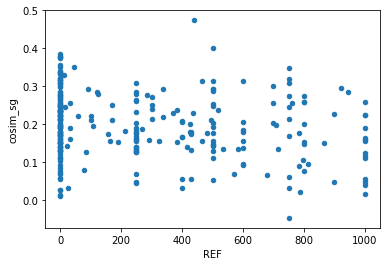

In [120]:
simp_overlap.plot(x = 'REF', y = 'cosim_sg', kind = 'scatter')


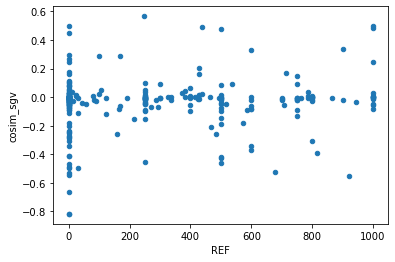

In [121]:
simp_overlap.plot(x = 'REF', y = 'cosim_sgv', kind = 'scatter')


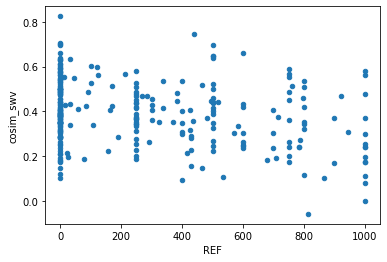

In [122]:
simp_overlap.plot(x = 'REF', y = 'cosim_swv', kind = 'scatter')

In [131]:
scorelist = ['cosim_sgv', 'cosim_sg', 'cosim_swv']

In [132]:
def get_corrs(df, cols, ref="REF", method = "pearson", mult = 1):
    outlist = []
    for c in cols:
        outlist.append( mult * df[ref].corr(df[c], method=method) )
    return outlist

In [135]:
get_corrs(simp_overlap, scorelist, mult = -1, method = "pearson")

[-0.09720148462999033, 0.19495947136848155, 0.2760342913074977]

In [136]:
get_corrs(simp_overlap, scorelist, mult = -1, method = "spearman")

[-0.034623818871246326, 0.18329474817928534, 0.2341824290760468]

In [140]:
def subcorrs(minref):
    sub = simp_overlap[simp_overlap.REF >= minref]
    
    outs = [len(sub)]
    outs.append(get_corrs(sub, scorelist, mult = -1, method = 'pearson'))
    outs.append(get_corrs(sub, scorelist, mult = -1, method = 'spearman'))
    
    return outs

In [139]:
get_corrs(simp_overlap[simp_overlap.REF >= 500], scorelist, mult = -1, method= "pearson")

[-0.2409532725581044, 0.1973874897625546, 0.32315277553705113]

In [141]:
subcorrs(500)

[77,
 [-0.2409532725581044, 0.1973874897625546, 0.32315277553705113],
 [-0.3096006715164736, 0.17898311442969775, 0.31329351000626554]]

In [146]:
for i in range(0, 1000, 100):
    print(i, subcorrs(i))

0 [274, [-0.09720148462999033, 0.19495947136848155, 0.2760342913074977], [-0.034623818871246326, 0.18329474817928534, 0.2341824290760468]]
100 [146, [-0.020127832012549314, 0.15098818202858724, 0.2915953010616968], [-0.0017050801797157838, 0.13068539620332414, 0.2710361390780452]]
200 [136, [-0.04621069759236261, 0.1203171279255027, 0.25735073875379055], [-0.022135630494109514, 0.09363304592289633, 0.23877768844712394]]
300 [106, [-0.06767613001017626, 0.20168546800475518, 0.2608367994200998], [0.03176605914419105, 0.18204648387395617, 0.23361890096519422]]
400 [96, [-0.10744864234784064, 0.1452900233011959, 0.22069693699417775], [-0.05740524084699931, 0.11011821536362727, 0.17713305397151788]]
500 [77, [-0.2409532725581044, 0.1973874897625546, 0.32315277553705113], [-0.3096006715164736, 0.17898311442969775, 0.31329351000626554]]
600 [56, [-0.25829091833150286, 0.14417899583067129, 0.18652600949980538], [-0.2866200788325487, 0.15255696559417314, 0.1845921967348338]]
700 [47, [-0.181720

Explore overlap between corpora - interesting that only c. 50% of the 150k from Simple also appear on the English lists

In [149]:
simp_comp = simp_res.merge(w10p_w2v, on='mwe', how = 'left')

In [154]:
simp_lost = simp_comp[np.isnan(simp_comp.batch_y)].reset_index(drop=True)

In [155]:
simp_lost

,mwe,freq,poisson_x,len_x,batch_x,stopwords_x,cosine_sim,base_nearest,mwe_nearest,component_cosims_x,poisson_y,len_y,batch_y,stopwords_y,component_cosims_y,cosim_10w
0,"(is, both, the)",35,-2568.582045,3,5,"[1, 0, 1]",-0.150264,"[[('was', 0.5867345333099365), ('are', 0.47631...","[('is+the+5th', 0.81363844871521), ('is+the+2n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(die, was)",37,-1847.535848,2,2,"[0, 1]",-0.149292,"[[('hurt', 0.6130431294441223), ('dying', 0.61...","[('two+terms+as', 0.676414966583252), ('Leahy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(to, die, was)",37,-2539.934129,3,10,"[1, 0, 1]",-0.134621,"[[('would', 0.5098848938941956), ('ultimately'...","[('Agnew', 0.6467652320861816), ('Carnahan', 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(They, are, from)",34,-2384.293959,3,4,"[0, 1, 1]",-0.125547,"[[('they', 0.7551847696304321), ('These', 0.62...","[('Iowa+United+States', 0.81873619556427), ('B...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(but, the, one)",24,-1744.282143,3,9,"[0, 1, 1]",-0.125307,"[[('however', 0.8109905123710632), ('although'...","[('in+area+and', 0.6621363162994385), ('propul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75616,"(increment:1000, start:0, ScaleMinor)",36,-1604.864335,3,5,"[0, 0, 0]",0.970057,"[[('increment:2500+start:0+BackgroundColors', ...","[('increment:500+start:0+BackgroundColors', 0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75617,"(Maerz, and)",49,-2300.898593,2,3,"[0, 1]",0.973944,"[[('Maerz+and', 0.9739437103271484), ('PerBang...","[('Maerz', 0.9739437103271484), ('PerBang.dk',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75618,"(increment:50000, start:0, ScaleMinor)",46,-2038.355890,3,5,"[0, 0, 0]",0.981962,"[[('increment:50000+start:0+ScaleMinor', 0.995...","[('increment:25000', 0.9958760738372803), ('in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75619,"(increment:5000, start:0, ScaleMinor)",39,-1740.630231,3,5,"[0, 0, 0]",0.988815,"[[('increment:10000+start:0+ScaleMinor', 0.996...","[('increment:2500+start:0+BackgroundColors', 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
